# Clustering (K-Means)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #Para asignar el formato de seaborn

%matplotlib inline

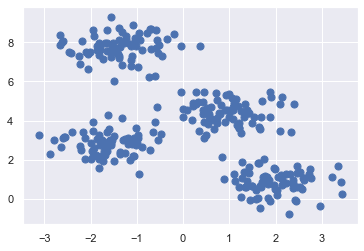

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [3]:
dfCluster = pd.concat([pd.DataFrame(X), pd.DataFrame(y_true, columns=['Cluster'])], axis=1)  #pd.DataFrame(X,y_true) 
dfCluster.head()

,0,1,Cluster
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [5]:
dfKMeans = pd.concat([dfCluster, pd.DataFrame(y_kmeans, columns=['Cluster_KMeans'])], axis=1)
dfKMeans.head()

,0,1,Cluster,Cluster_KMeans
0,0.836857,2.136359,1,1
1,-1.413658,7.409623,3,0
2,1.155213,5.099619,0,3
3,-1.018616,7.814915,3,0
4,1.271351,1.892542,1,1


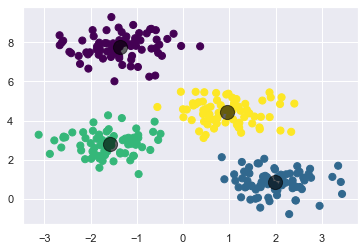

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)

# KMeans - Iris datasets

In [7]:
from sklearn import datasets
bchIris = datasets.load_iris()
df_iris_species = pd.DataFrame(bchIris.target, 
                               columns=['target']).merge(pd.DataFrame(bchIris.target_names, columns=['species']),
                                                        left_on='target', right_index=True, how='inner')
df_iris = pd.concat([pd.DataFrame(bchIris.data, columns=bchIris.feature_names),
                    df_iris_species.species], axis=1)
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

Text(0.5, 1.0, 'Petal')

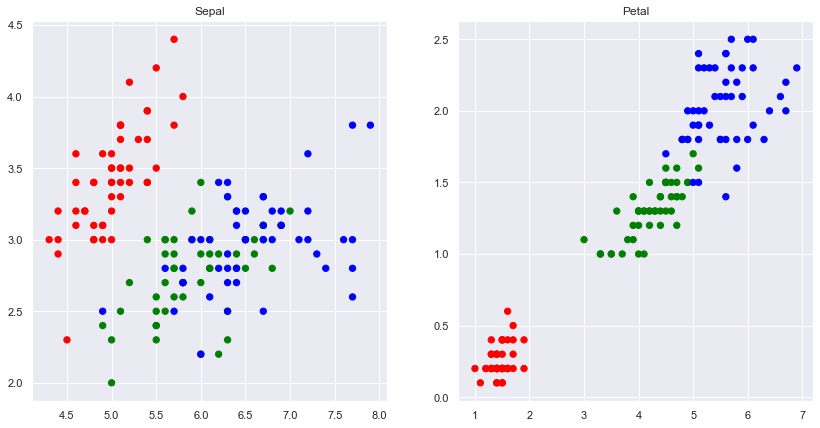

In [8]:
plt.figure(figsize=(14, 7))
colormap=np.array(['red', 'green', 'blue'])
plt.subplot(1, 2, 1)
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], c=colormap[bchIris.target], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=colormap[bchIris.target], s=40)
plt.title('Petal')

# KMeans (model)

In [9]:
X = bchIris.data
Y = bchIris.target
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
y_predict = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

Text(0.5, 1.0, 'K-Means (Species)')

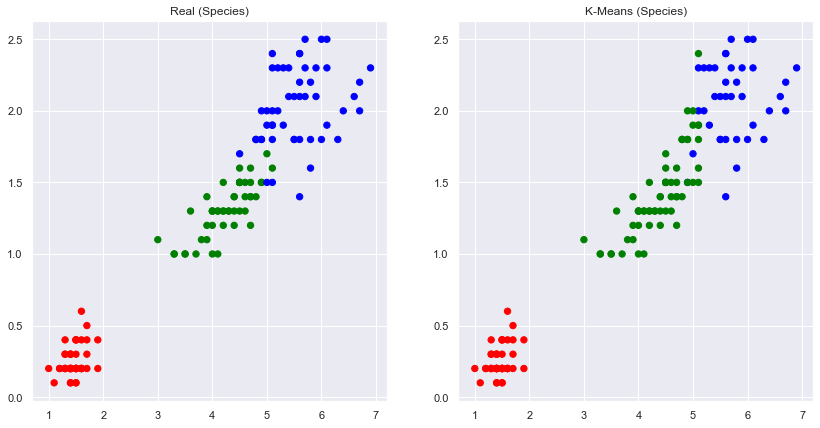

In [10]:
plt.figure(figsize=(14, 7))
colormap=np.array(['red', 'green', 'blue'])
plt.subplot(1, 2, 1)
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=colormap[bchIris.target], s=40)
plt.title('Real (Species)')
plt.subplot(1, 2, 2)
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=colormap[y_predict], s=40)
plt.title('K-Means (Species)')

In [11]:
import sklearn.metrics as sm
arrays_index = [['Real']*3, bchIris.target_names]
arrays_columns = [['Predicted']*3, bchIris.target_names]
pd.DataFrame(sm.confusion_matrix(Y, y_predict), columns=arrays_columns, index=arrays_index)

Predicted                     
                   setosa versicolor virginica
Real setosa            50          0         0
     versicolor         0         48         2
     virginica          0         14        36

In [12]:
print(sm.classification_report(Y, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



Text(0, 0.5, 'Inertia')

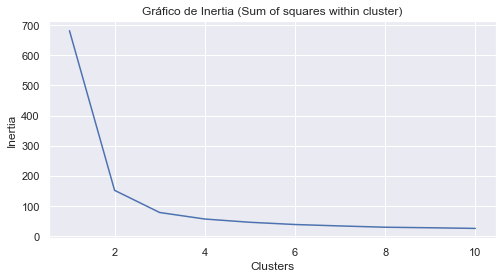

In [13]:
list_inertia = []
plt.figure(figsize=(8,4))
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    list_inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), list_inertia)
plt.title('Gráfico de Inertia (Sum of squares within cluster)')
plt.xlabel('Clusters')
plt.ylabel('Inertia')